<a href="https://colab.research.google.com/github/Arunjaykr/Arunjaykr/blob/main/Active_User.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
import pandas as pd

# Load the Excel file
file_path = "/content/Active Users (4) (1) (1) (1) (1).xlsx"
xls = pd.ExcelFile(file_path)

# Load the "Active Users" sheet
df = pd.read_excel(xls, sheet_name="Active Users")

# Remove empty columns (if any)
df = df.iloc[:, :-4]

# Convert to binary (1 = active, 0 = inactive)
df_cleaned = df.notna().astype(int)

# Transpose the data to make weeks the index
df_transposed = df_cleaned.T
df_transposed.index = [f"W{i+1}" for i in range(df_transposed.shape[0])]

# Display the transformed data
print(df_transposed.head())

wau_per_week = df_transposed.sum(axis=1)

    0     1     2     3     4     5     6     7     8     9     ...  4004  \
W1     1     1     1     1     1     1     1     1     1     1  ...     0   
W2     1     1     1     1     1     1     1     1     1     1  ...     0   
W3     1     1     1     1     1     1     1     1     1     1  ...     0   
W4     1     1     1     1     1     1     1     1     1     1  ...     0   
W5     1     1     1     1     1     1     1     1     1     1  ...     0   

    4005  4006  4007  4008  4009  4010  4011  4012  4013  
W1     0     0     0     0     0     0     0     0     0  
W2     0     0     0     0     0     0     0     0     0  
W3     0     0     0     0     0     0     0     0     0  
W4     0     0     0     0     0     0     0     0     0  
W5     0     0     0     0     0     0     0     0     0  

[5 rows x 4014 columns]


In [2]:
import numpy as np

# Ensure all values are numeric (0 or 1)
df_transposed = df_transposed.fillna(0).astype(int)

# Compute user categories
new_users = df_transposed.diff().fillna(df_transposed).clip(lower=0).sum(axis=1)
retained_users = (df_transposed & df_transposed.shift(1).fillna(0).astype(int)).sum(axis=1)
resurrected_users = ((df_transposed == 1) &
                      (df_transposed.shift(1).fillna(0) == 0) &
                      (df_transposed.shift(2).fillna(0) == 0)).sum(axis=1)
churned_users = ((df_transposed.shift(1) == 1) & (df_transposed == 0)).sum(axis=1)

# Print results
print(new_users.head(), retained_users.head(), resurrected_users.head(), churned_users.head())


quick_ratio = (new_users + resurrected_users) / churned_users.replace(0, np.nan)

W1    1759.0
W2       0.0
W3      78.0
W4     384.0
W5      77.0
dtype: float64 W1       0
W2    1654
W3    1654
W4    1732
W5    2116
dtype: int64 W1    1759
W2       0
W3       0
W4     384
W5      77
dtype: int64 W1      0
W2    105
W3      0
W4      0
W5      0
dtype: int64


In [3]:
growth_accounting_df = pd.DataFrame({
    "WAU": wau_per_week,
    "New Users": new_users,
    "Retained Users": retained_users,
    "Resurrected Users": resurrected_users,
    "Churned Users": churned_users,
    "Quick Ratio": quick_ratio
})
print(growth_accounting_df.head())

     WAU  New Users  Retained Users  Resurrected Users  Churned Users  \
W1  1759     1759.0               0               1759              0   
W2  1654        0.0            1654                  0            105   
W3  1732       78.0            1654                  0              0   
W4  2116      384.0            1732                384              0   
W5  2193       77.0            2116                 77              0   

    Quick Ratio  
W1          NaN  
W2          0.0  
W3          NaN  
W4          NaN  
W5          NaN  


In [4]:
import pandas as pd
import numpy as np

# Sample Data: Replace this with your actual dataset
# The dataset should have columns: ['user_id', 'date']
data = pd.DataFrame({
    'user_id': np.random.randint(1, 1000, 5000),
    'date': pd.date_range(start='2024-01-01', periods=5000, freq='D')
})

data['date'] = pd.to_datetime(data['date'])
data['week'] = data['date'].dt.to_period('W')

# Weekly Active Users calculation (WAU)
user_weekly = data.groupby(['user_id', 'week']).size().reset_index().pivot(index='user_id', columns='week', values=0)
user_weekly = user_weekly.notnull().astype(int)  # Convert to binary active/inactive

weeks = list(user_weekly.columns)
weekly_stats = []

# Loop through each week to calculate New, Retained, Resurrected, and Churned Users
for i in range(1, len(weeks)):
    prev_week, current_week = weeks[i-1], weeks[i]

    # Calculate New Users: Active in current week, but inactive in previous week
    new_users = (user_weekly[current_week] == 1) & (user_weekly[prev_week] == 0)

    # Calculate Retained Users: Active in both current and previous weeks
    retained_users = (user_weekly[current_week] == 1) & (user_weekly[prev_week] == 1)

    # Calculate Resurrected Users: Inactive in previous week, but active in current week
    resurrected_users = (user_weekly[current_week] == 1) & (user_weekly[prev_week] == 0)

    # Calculate Churned Users: Active in previous week, but inactive in current week
    churned_users = (user_weekly[current_week] == 0) & (user_weekly[prev_week] == 1)

    weekly_stats.append({
        'week': current_week,
        'new_users': new_users.sum(),
        'retained_users': retained_users.sum(),
        'resurrected_users': resurrected_users.sum(),
        'churned_users': churned_users.sum()
    })

# Create DataFrame with the results
stats_df = pd.DataFrame(weekly_stats)

# Display the calculated stats
print(stats_df)

                      week  new_users  retained_users  resurrected_users  \
0    2024-01-08/2024-01-14          7               0                  7   
1    2024-01-15/2024-01-21          7               0                  7   
2    2024-01-22/2024-01-28          7               0                  7   
3    2024-01-29/2024-02-04          7               0                  7   
4    2024-02-05/2024-02-11          7               0                  7   
..                     ...        ...             ...                ...   
709  2037-08-10/2037-08-16          7               0                  7   
710  2037-08-17/2037-08-23          7               0                  7   
711  2037-08-24/2037-08-30          7               0                  7   
712  2037-08-31/2037-09-06          7               0                  7   
713  2037-09-07/2037-09-13          2               0                  2   

     churned_users  
0                7  
1                7  
2                7  
3  

<Figure size 1200x600 with 0 Axes>

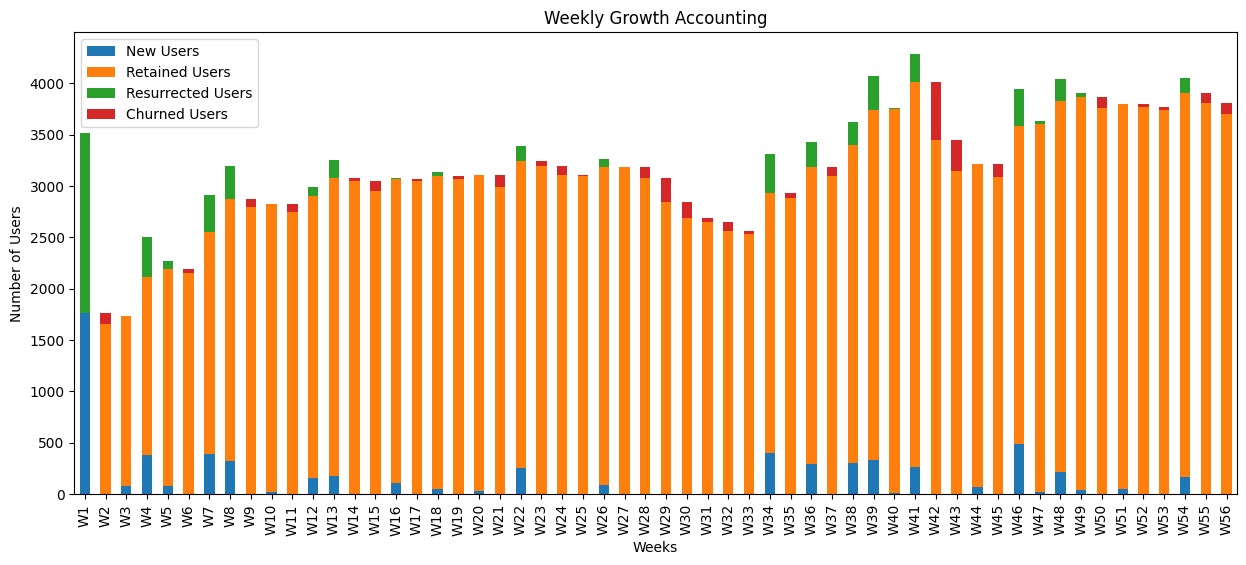

In [25]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 6))
growth_accounting_df[["New Users", "Retained Users", "Resurrected Users", "Churned Users"]].plot(kind="bar", stacked=True, figsize=(15,6))
plt.title("Weekly Growth Accounting")
plt.xlabel("Weeks")
plt.ylabel("Number of Users")
plt.legend()
plt.show()

# Visualize Both Scenarios

<ipython-input-20-fa82ba315099>:6: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  months = pd.date_range('2024-01-01', periods=6, freq='M').strftime('%b %Y')


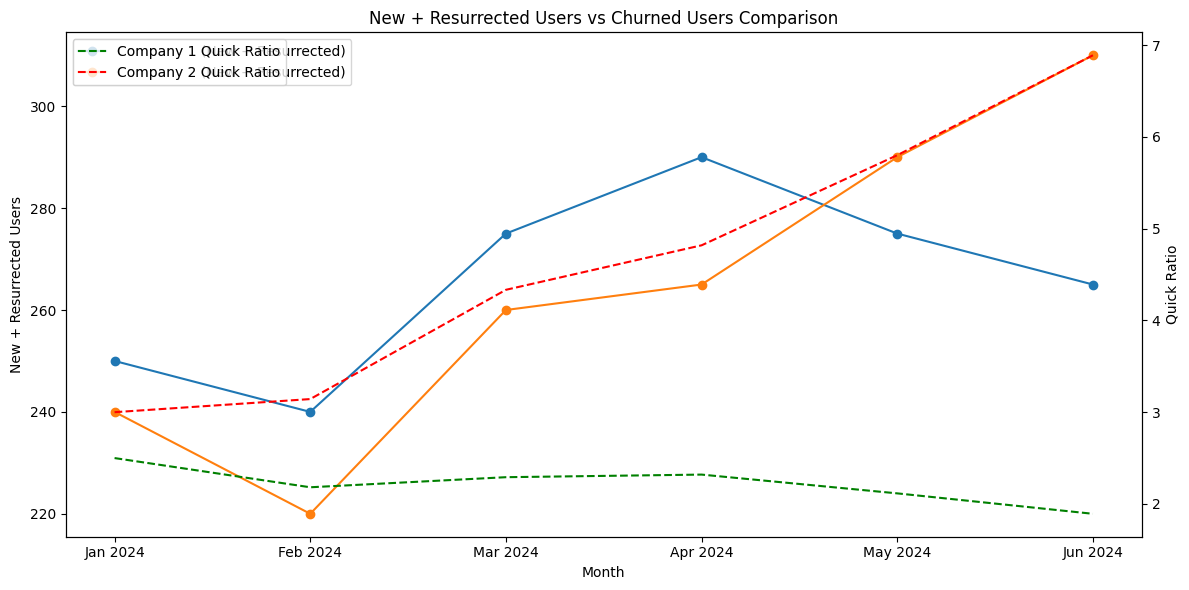

In [20]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Example Data for Company 1 (higher churn, moderate retention)
months = pd.date_range('2024-01-01', periods=6, freq='M').strftime('%b %Y')

company_1 = pd.DataFrame({
    'month': months,
    'new_users': [200, 180, 220, 240, 230, 210],
    'retained_users': [150, 140, 160, 170, 160, 150],
    'resurrected_users': [50, 60, 55, 50, 45, 55],
    'churned_users': [100, 110, 120, 125, 130, 140]
})

# Example Data for Company 2 (better retention, moderate churn)
company_2 = pd.DataFrame({
    'month': months,
    'new_users': [200, 190, 210, 220, 240, 250],
    'retained_users': [160, 170, 180, 185, 190, 200],
    'resurrected_users': [40, 30, 50, 45, 50, 60],
    'churned_users': [80, 70, 60, 55, 50, 45]
})

# Calculate Quick Ratio
company_1['quick_ratio'] = (company_1['new_users'] + company_1['resurrected_users']) / company_1['churned_users']
company_2['quick_ratio'] = (company_2['new_users'] + company_2['resurrected_users']) / company_2['churned_users']

# Plot Comparison
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot New + Resurrected Users vs Churned for both companies
ax1.plot(company_1['month'], company_1['new_users'] + company_1['resurrected_users'], label='Company 1 (New + Resurrected)', marker='o')
ax1.plot(company_2['month'], company_2['new_users'] + company_2['resurrected_users'], label='Company 2 (New + Resurrected)', marker='o')

ax1.set_xlabel('Month')
ax1.set_ylabel('New + Resurrected Users')
ax1.set_title('New + Resurrected Users vs Churned Users Comparison')
ax1.legend()

# Create a second y-axis for Quick Ratio
ax2 = ax1.twinx()
ax2.plot(company_1['month'], company_1['quick_ratio'], label='Company 1 Quick Ratio', linestyle='--', color='green')
ax2.plot(company_2['month'], company_2['quick_ratio'], label='Company 2 Quick Ratio', linestyle='--', color='red')
ax2.set_ylabel('Quick Ratio')
ax2.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# **Growth Accounting with Weekly Active Users (WAU)**

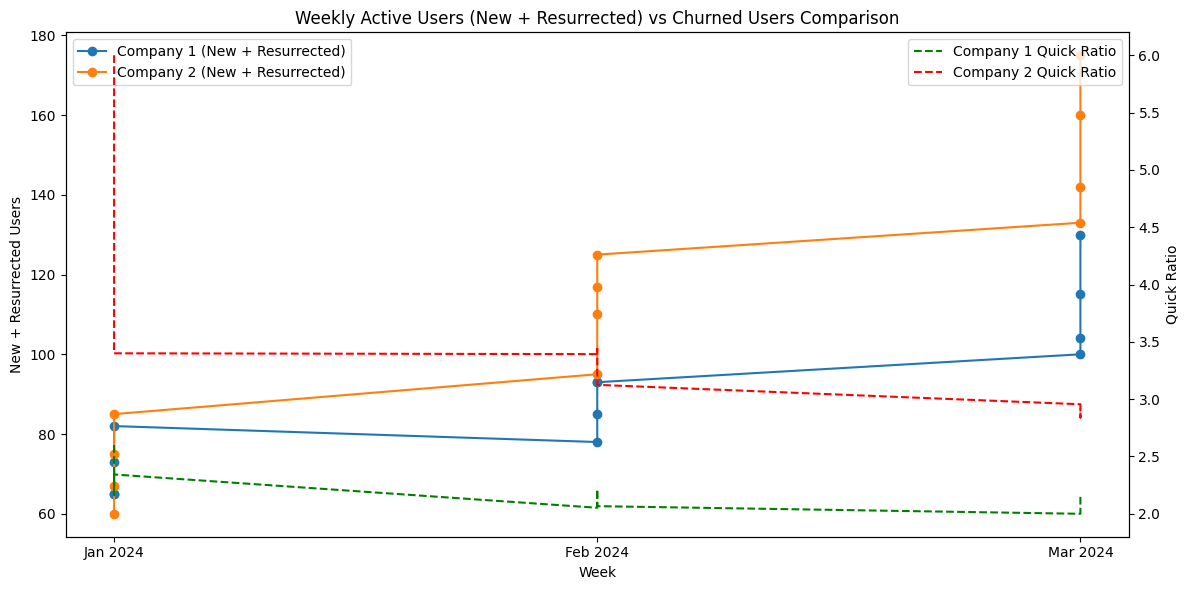

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sample Data (Weekly Active Users) - Modify to your actual dataset
weeks = pd.date_range('2024-01-01', periods=12, freq='W').strftime('%b %Y')

company_1_weekly = pd.DataFrame({
    'week': weeks,
    'new_users': [50, 45, 55, 60, 58, 62, 68, 65, 70, 72, 80, 90],
    'retained_users': [35, 40, 42, 43, 45, 50, 52, 53, 55, 60, 62, 70],
    'resurrected_users': [15, 20, 18, 22, 20, 23, 25, 28, 30, 32, 35, 40],
    'churned_users': [25, 30, 32, 35, 38, 40, 42, 45, 50, 52, 55, 60]
})

company_2_weekly = pd.DataFrame({
    'week': weeks,
    'new_users': [50, 55, 60, 65, 70, 80, 85, 90, 95, 100, 110, 120],
    'retained_users': [45, 50, 55, 60, 65, 70, 75, 80, 85, 90, 100, 110],
    'resurrected_users': [10, 12, 15, 20, 25, 30, 32, 35, 38, 42, 50, 55],
    'churned_users': [10, 15, 20, 25, 28, 32, 35, 40, 45, 50, 55, 60]
})

# Calculate Quick Ratio for Weekly Data
company_1_weekly['quick_ratio'] = (company_1_weekly['new_users'] + company_1_weekly['resurrected_users']) / company_1_weekly['churned_users']
company_2_weekly['quick_ratio'] = (company_2_weekly['new_users'] + company_2_weekly['resurrected_users']) / company_2_weekly['churned_users']

# Plot Comparison of New + Resurrected Users vs Churned for Both Companies (Weekly)
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot New + Resurrected Users vs Churned for both companies
ax1.plot(company_1_weekly['week'], company_1_weekly['new_users'] + company_1_weekly['resurrected_users'], label='Company 1 (New + Resurrected)', marker='o')
ax1.plot(company_2_weekly['week'], company_2_weekly['new_users'] + company_2_weekly['resurrected_users'], label='Company 2 (New + Resurrected)', marker='o')

ax1.set_xlabel('Week')
ax1.set_ylabel('New + Resurrected Users')
ax1.set_title('Weekly Active Users (New + Resurrected) vs Churned Users Comparison')
ax1.legend()

# Create a second y-axis for Quick Ratio
ax2 = ax1.twinx()
ax2.plot(company_1_weekly['week'], company_1_weekly['quick_ratio'], label='Company 1 Quick Ratio', linestyle='--', color='green')
ax2.plot(company_2_weekly['week'], company_2_weekly['quick_ratio'], label='Company 2 Quick Ratio', linestyle='--', color='red')
ax2.set_ylabel('Quick Ratio')
ax2.legend()

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Visualizing Growth Accounting

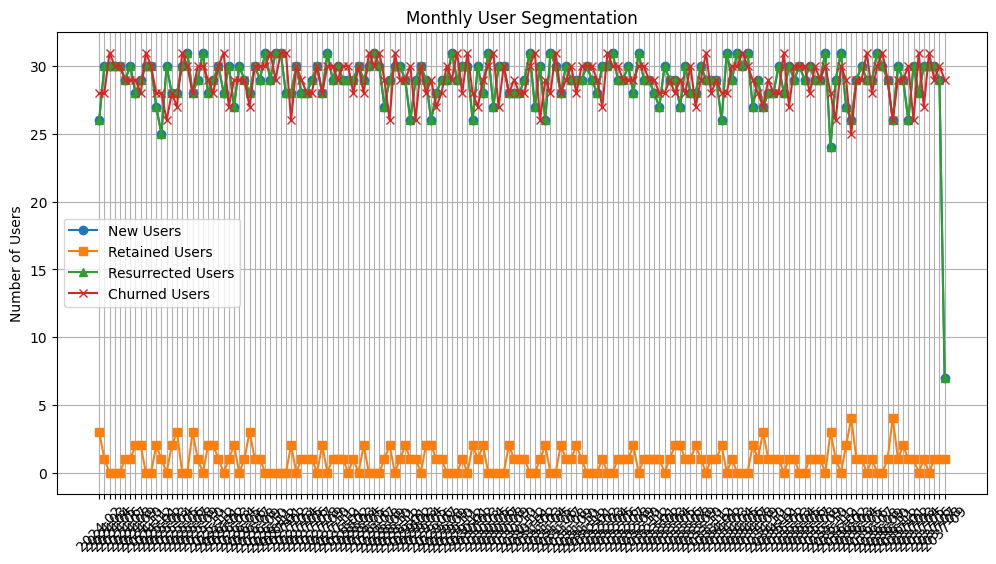

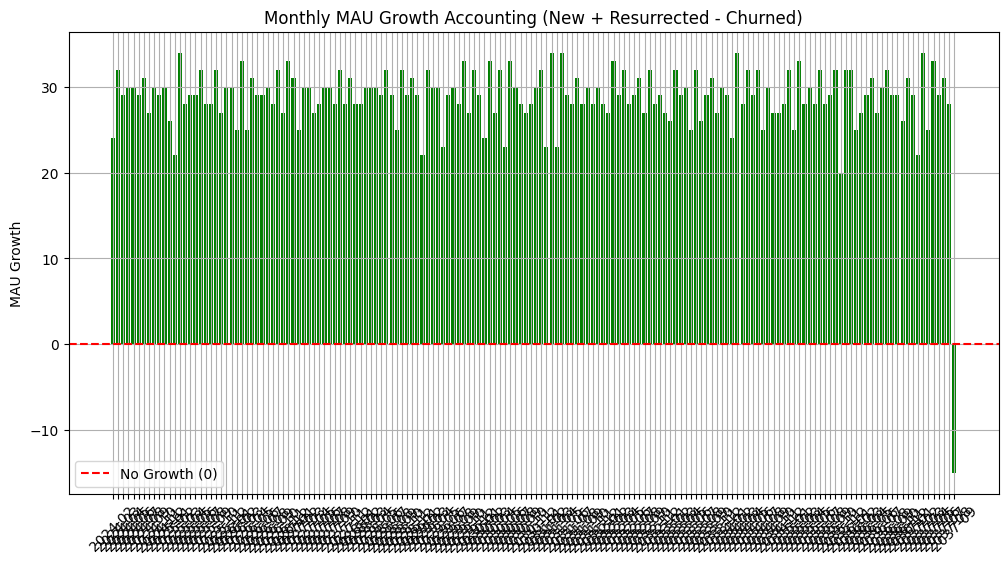

In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sample Data: Replace this with your actual dataset
data = pd.DataFrame({
    'user_id': np.random.randint(1, 1000, 5000),
    'date': pd.date_range(start='2024-01-01', periods=5000, freq='D')
})

# Ensure the 'date' column is a datetime type
data['date'] = pd.to_datetime(data['date'])

# Create weekly or monthly period
data['month'] = data['date'].dt.to_period('M')

# Group by user_id and month to get active users
user_monthly = data.groupby(['user_id', 'month']).size().reset_index().pivot(index='user_id', columns='month', values=0)
user_monthly = user_monthly.notnull().astype(int)  # Convert to binary active/inactive

months = list(user_monthly.columns)
monthly_stats = []

# Loop through each month to calculate New, Retained, Resurrected, and Churned Users
for i in range(1, len(months)):
    prev_month, current_month = months[i-1], months[i]

    # Calculate New Users: Active in current month, but inactive in previous month
    new_users = (user_monthly[current_month] == 1) & (user_monthly[prev_month] == 0)

    # Calculate Retained Users: Active in both current and previous months
    retained_users = (user_monthly[current_month] == 1) & (user_monthly[prev_month] == 1)

    # Calculate Resurrected Users: Inactive in previous month, but active in current month
    resurrected_users = (user_monthly[current_month] == 1) & (user_monthly[prev_month] == 0)

    # Calculate Churned Users: Active in previous month, but inactive in current month
    churned_users = (user_monthly[current_month] == 0) & (user_monthly[prev_month] == 1)

    # Store the results
    monthly_stats.append({
        'month': current_month,
        'new_users': new_users.sum(),
        'retained_users': retained_users.sum(),
        'resurrected_users': resurrected_users.sum(),
        'churned_users': churned_users.sum()
    })

# Create DataFrame with the results
stats_df = pd.DataFrame(monthly_stats)

# Calculate MAU growth accounting: MAU(t) - MAU(t-1 month) = new(t) + resurrected(t) - churned(t)
stats_df['mau_growth'] = stats_df['new_users'] + stats_df['resurrected_users'] - stats_df['churned_users']

# Visualization: Plot New, Retained, Resurrected, and Churned Users per Month
plt.figure(figsize=(12, 6))
plt.plot(stats_df['month'].astype(str), stats_df['new_users'], label='New Users', marker='o')
plt.plot(stats_df['month'].astype(str), stats_df['retained_users'], label='Retained Users', marker='s')
plt.plot(stats_df['month'].astype(str), stats_df['resurrected_users'], label='Resurrected Users', marker='^')
plt.plot(stats_df['month'].astype(str), stats_df['churned_users'], label='Churned Users', marker='x')
plt.xticks(rotation=45)
plt.ylabel('Number of Users')
plt.title('Monthly User Segmentation')
plt.legend()
plt.grid()
plt.show()

# Visualization: MAU Growth Accounting (New + Resurrected - Churned)
plt.figure(figsize=(12, 6))
plt.bar(stats_df['month'].astype(str), stats_df['mau_growth'], color='green')
plt.axhline(y=0, color='red', linestyle='--', label='No Growth (0)')
plt.xticks(rotation=45)
plt.ylabel('MAU Growth')
plt.title('Monthly MAU Growth Accounting (New + Resurrected - Churned)')
plt.legend()
plt.grid()
plt.show()

# Visualize Retention, Churn, and Quick Ratio

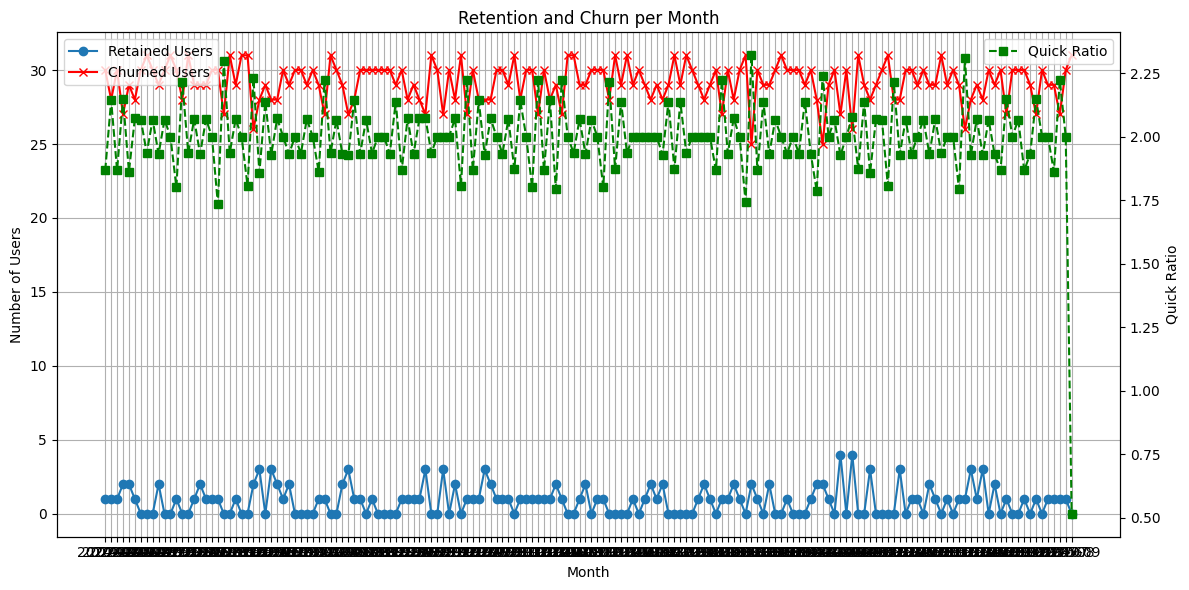

In [19]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sample Data: Replace this with your actual dataset
data = pd.DataFrame({
    'user_id': np.random.randint(1, 1000, 5000),
    'date': pd.date_range(start='2024-01-01', periods=5000, freq='D')
})

# Ensure the 'date' column is a datetime type
data['date'] = pd.to_datetime(data['date'])

# Create monthly period
data['month'] = data['date'].dt.to_period('M')

# Group by user_id and month to get active users
user_monthly = data.groupby(['user_id', 'month']).size().reset_index().pivot(index='user_id', columns='month', values=0)
user_monthly = user_monthly.notnull().astype(int)  # Convert to binary active/inactive

months = list(user_monthly.columns)
monthly_stats = []

# Loop through each month to calculate New, Retained, Resurrected, and Churned Users
for i in range(1, len(months)):
    prev_month, current_month = months[i-1], months[i]

    # Calculate New Users: Active in current month, but inactive in previous month
    new_users = (user_monthly[current_month] == 1) & (user_monthly[prev_month] == 0)

    # Calculate Retained Users: Active in both current and previous months
    retained_users = (user_monthly[current_month] == 1) & (user_monthly[prev_month] == 1)

    # Calculate Resurrected Users: Inactive in previous month, but active in current month
    resurrected_users = (user_monthly[current_month] == 1) & (user_monthly[prev_month] == 0)

    # Calculate Churned Users: Active in previous month, but inactive in current month
    churned_users = (user_monthly[current_month] == 0) & (user_monthly[prev_month] == 1)

    # Store the results
    monthly_stats.append({
        'month': current_month,
        'new_users': new_users.sum(),
        'retained_users': retained_users.sum(),
        'resurrected_users': resurrected_users.sum(),
        'churned_users': churned_users.sum()
    })

# Create DataFrame with the results
stats_df = pd.DataFrame(monthly_stats)

# Calculate MAU growth accounting: MAU(t) - MAU(t-1 month) = new(t) + resurrected(t) - churned(t)
stats_df['mau_growth'] = stats_df['new_users'] + stats_df['resurrected_users'] - stats_df['churned_users']

# Calculate Quick Ratio: (new + resurrected) / churned
stats_df['quick_ratio'] = (stats_df['new_users'] + stats_df['resurrected_users']) / stats_df['churned_users']

# Visualization: Plot Retained, Churned Users and Quick Ratio per Month
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot Retained and Churned Users
ax1.plot(stats_df['month'].astype(str), stats_df['retained_users'], label='Retained Users', marker='o')
ax1.plot(stats_df['month'].astype(str), stats_df['churned_users'], label='Churned Users', marker='x', color='red')
ax1.set_xlabel('Month')
ax1.set_ylabel('Number of Users')
ax1.set_title('Retention and Churn per Month')
ax1.legend(loc='upper left')
ax1.grid()

# Create a second y-axis for Quick Ratio
ax2 = ax1.twinx()
ax2.plot(stats_df['month'].astype(str), stats_df['quick_ratio'], label='Quick Ratio', marker='s', color='green', linestyle='--')
ax2.set_ylabel('Quick Ratio')
ax2.legend(loc='upper right')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Question 1: How can we analyze and visualize the weekly activity of users, including new, retained, resurrected, and churned users, while also calculating the Quick Ratio to measure user growth?
This question addresses the core functionality of the code:

Grouping users by week. Categorizing users as new, retained, resurrected, or churned. Calculating the Quick Ratio to assess growth. Visualizing user trends with line charts, a Quick Ratio plot, and a stacked area chart.

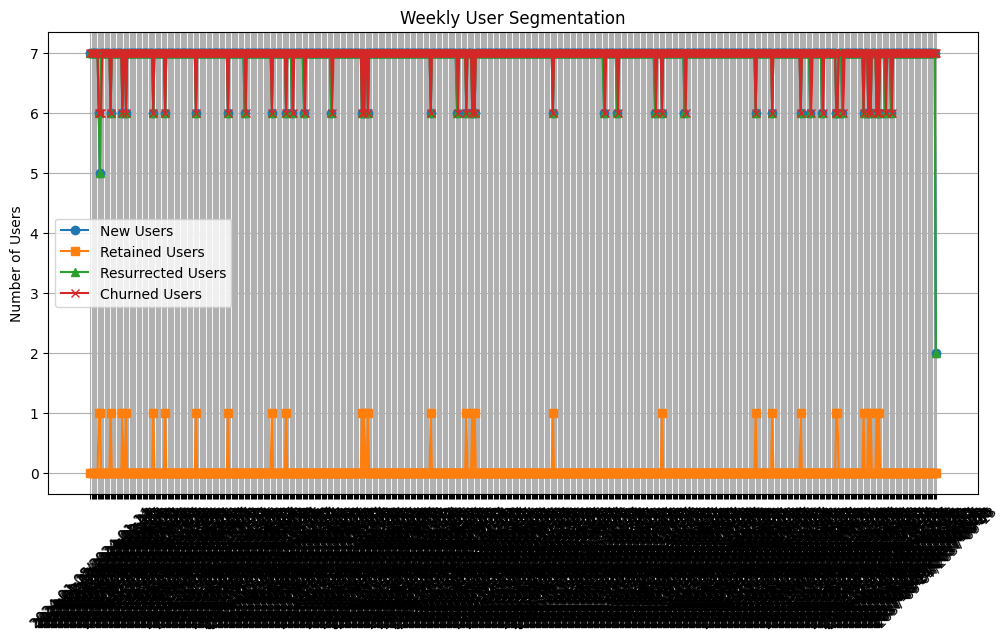

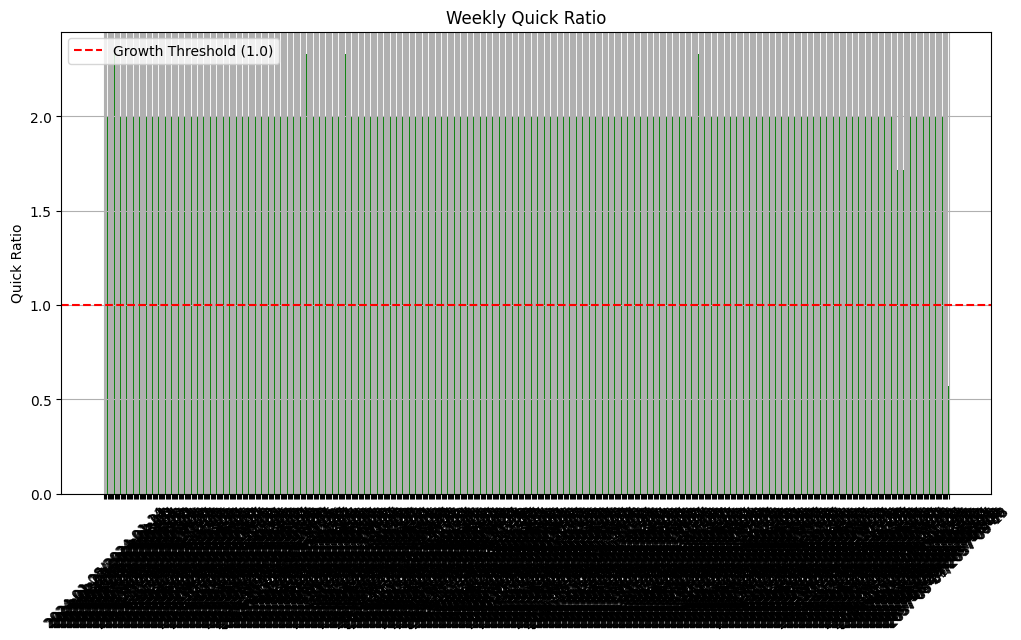

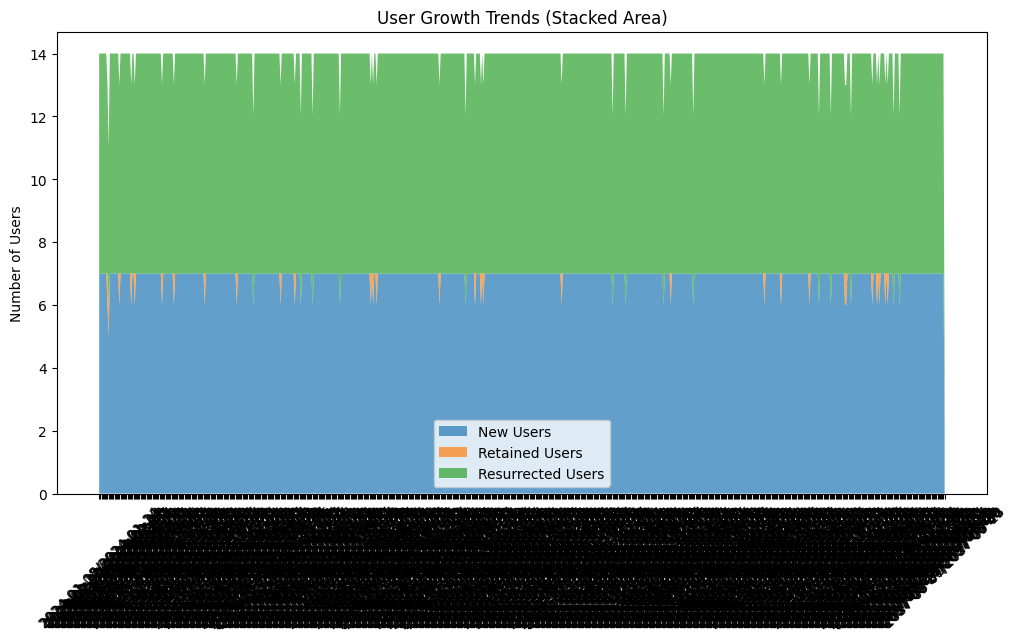

In [21]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

# Sample Data: Replace this with your actual dataset
# The dataset should have columns: ['user_id', 'date']
data = pd.DataFrame({
    'user_id': np.random.randint(1, 1000, 5000),
    'date': pd.date_range(start='2024-01-01', periods=5000, freq='D')
})

data['date'] = pd.to_datetime(data['date'])
data['week'] = data['date'].dt.to_period('W')

# Compute WAU
wau = data.groupby(['week'])['user_id'].nunique()
wau_df = pd.DataFrame(wau).reset_index()
wau_df.columns = ['week', 'wau']

# Identify New, Retained, Resurrected, and Churned Users
user_weekly = data.groupby(['user_id', 'week']).size().reset_index().pivot(index='user_id', columns='week', values=0)
user_weekly = user_weekly.notnull().astype(int)  # Convert to binary active/inactive

weeks = list(user_weekly.columns)
weekly_stats = []
for i in range(1, len(weeks)):
    prev_week, current_week = weeks[i-1], weeks[i]
    new_users = (user_weekly[current_week] == 1) & (user_weekly[prev_week] == 0)
    retained_users = (user_weekly[current_week] == 1) & (user_weekly[prev_week] == 1)
    resurrected_users = (user_weekly[current_week] == 1) & (user_weekly[prev_week] == 0)
    churned_users = (user_weekly[current_week] == 0) & (user_weekly[prev_week] == 1)

    weekly_stats.append({
        'week': current_week,
        'new_users': new_users.sum(),
        'retained_users': retained_users.sum(),
        'resurrected_users': resurrected_users.sum(),
        'churned_users': churned_users.sum()
    })

stats_df = pd.DataFrame(weekly_stats)
stats_df['quick_ratio'] = (stats_df['new_users'] + stats_df['resurrected_users']) / stats_df['churned_users']

# Visualization
plt.figure(figsize=(12, 6))
plt.plot(stats_df['week'].astype(str), stats_df['new_users'], label='New Users', marker='o')
plt.plot(stats_df['week'].astype(str), stats_df['retained_users'], label='Retained Users', marker='s')
plt.plot(stats_df['week'].astype(str), stats_df['resurrected_users'], label='Resurrected Users', marker='^')
plt.plot(stats_df['week'].astype(str), stats_df['churned_users'], label='Churned Users', marker='x')
plt.xticks(rotation=45)
plt.ylabel('Number of Users')
plt.title('Weekly User Segmentation')
plt.legend()
plt.grid()
plt.show()

# Quick Ratio Plot
plt.figure(figsize=(12, 6))
plt.bar(stats_df['week'].astype(str), stats_df['quick_ratio'], color='green')
plt.axhline(y=1, color='red', linestyle='--', label='Growth Threshold (1.0)')
plt.xticks(rotation=45)
plt.ylabel('Quick Ratio')
plt.title('Weekly Quick Ratio')
plt.legend()
plt.grid()
plt.show()

# Stacked Area Chart for User Trends
plt.figure(figsize=(12, 6))
plt.stackplot(stats_df['week'].astype(str), stats_df['new_users'], stats_df['retained_users'], stats_df['resurrected_users'],
              labels=['New Users', 'Retained Users', 'Resurrected Users'], alpha=0.7)
plt.xticks(rotation=45)
plt.ylabel('Number of Users')
plt.title('User Growth Trends (Stacked Area)')
plt.legend()
plt.show()

# Question 2 : What is the user retention rate at different time intervals (Day 1, Day 7, and Day 30) after their first interaction?"

<ipython-input-11-e39c1379ef32>:8: FutureWarning: 'H' is deprecated and will be removed in a future version, please use 'h' instead.
  dates = pd.date_range(start='2024-01-01', periods=5000, freq='H')


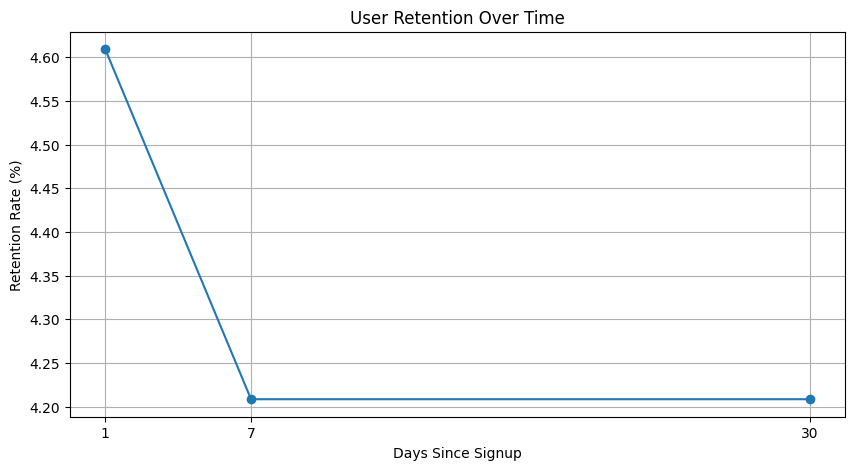

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sample Data: Replace with actual dataset
np.random.seed(42)
users = np.random.randint(1, 500, 5000)
dates = pd.date_range(start='2024-01-01', periods=5000, freq='H')
data = pd.DataFrame({'user_id': users, 'date': dates})

# Convert to datetime
data['date'] = pd.to_datetime(data['date'])

# Find First Seen Date per User
first_seen = data.groupby('user_id')['date'].min().reset_index()
first_seen.columns = ['user_id', 'first_seen']

# Merge to find retention
data = data.merge(first_seen, on='user_id')

# Calculate Days Since First Seen
data['days_since_first'] = (data['date'] - data['first_seen']).dt.days

# Retention Calculation
retention_days = [1, 7, 30]
retention = {}

for days in retention_days:
    retained_users = data[data['days_since_first'] == days]['user_id'].nunique()
    total_users = first_seen['user_id'].nunique()
    retention[days] = (retained_users / total_users) * 100  # Percentage

# Convert to DataFrame
retention_df = pd.DataFrame(list(retention.items()), columns=['Days', 'Retention Rate'])

# Plot Retention Trends
plt.figure(figsize=(10, 5))
plt.plot(retention_df['Days'], retention_df['Retention Rate'], marker='o', linestyle='-')
plt.xticks(retention_df['Days'])
plt.xlabel("Days Since Signup")
plt.ylabel("Retention Rate (%)")
plt.title("User Retention Over Time")
plt.grid()
plt.show()

# Question 3: Calculate Weekly Churn Rate and Analyze Retention Trends

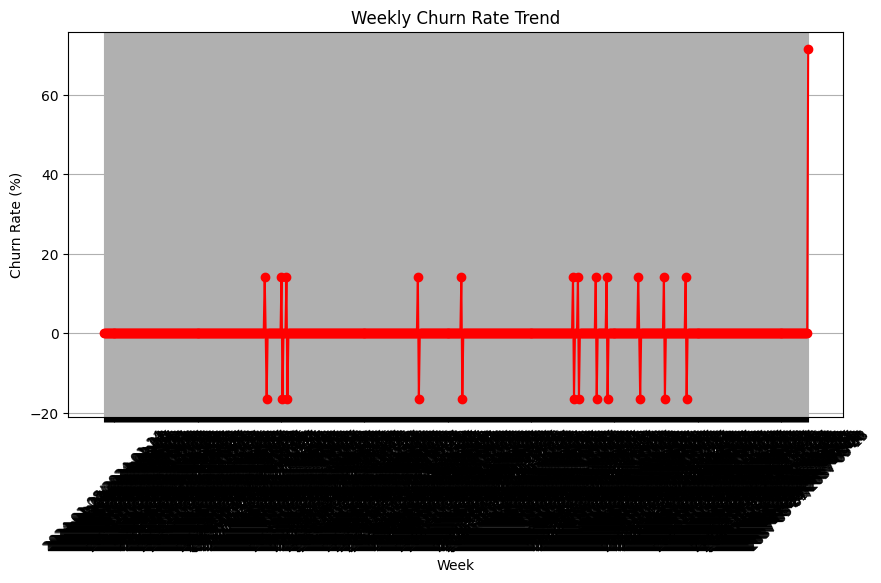

Retention is strong, churn rate is low.


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sample dataset: Replace with actual user data
np.random.seed(42)
users = np.random.randint(1, 1000, 5000)
dates = pd.date_range(start='2024-01-01', periods=5000, freq='D')
data = pd.DataFrame({'user_id': users, 'date': dates})

# Convert to datetime and extract weeks
data['date'] = pd.to_datetime(data['date'])
data['week'] = data['date'].dt.to_period('W')

# Compute weekly user counts
weekly_active_users = data.groupby('week')['user_id'].nunique().reset_index()
weekly_active_users.columns = ['week', 'wau']

# Calculate churn rate
weekly_active_users['prev_wau'] = weekly_active_users['wau'].shift(1)
weekly_active_users['churn_rate'] = ((weekly_active_users['prev_wau'] - weekly_active_users['wau']) / weekly_active_users['prev_wau']) * 100
weekly_active_users.dropna(inplace=True)

# Plot churn rate trend
plt.figure(figsize=(10, 5))
plt.plot(weekly_active_users['week'].astype(str), weekly_active_users['churn_rate'], marker='o', linestyle='-', color='red')
plt.xticks(rotation=45)
plt.xlabel("Week")
plt.ylabel("Churn Rate (%)")
plt.title("Weekly Churn Rate Trend")
plt.grid()
plt.show()

# Interpretation
average_churn = weekly_active_users['churn_rate'].mean()
if average_churn < 5:
    print("Retention is strong, churn rate is low.")
elif average_churn < 15:
    print("Moderate churn, keep an eye on retention strategies.")
else:
    print("High churn rate detected, urgent action needed!")

# Question 4: Predict Future WAU Using Simple Moving Average

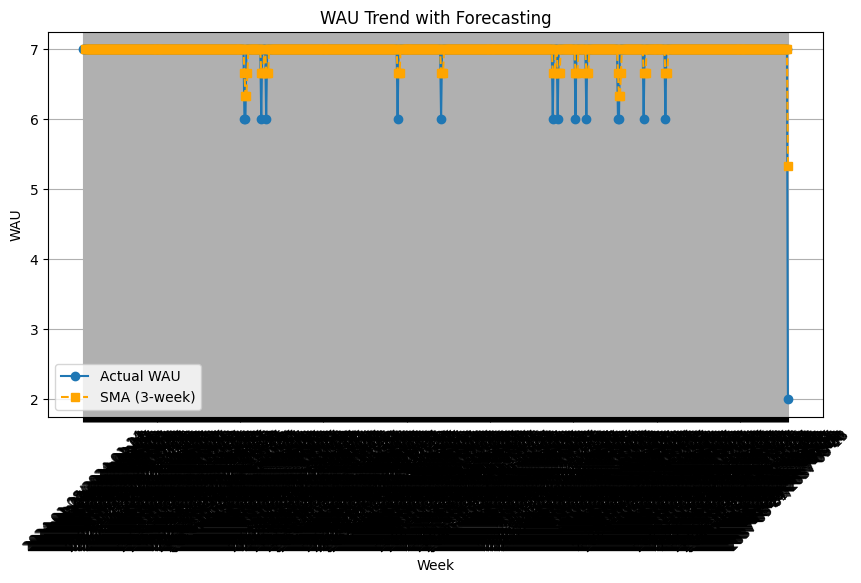

Predicted WAU for next week: 5


In [13]:
# Compute Simple Moving Average (SMA) for forecasting
weekly_active_users['SMA_3'] = weekly_active_users['wau'].rolling(window=3).mean()

# Plot WAU trend with SMA
plt.figure(figsize=(10, 5))
plt.plot(weekly_active_users['week'].astype(str), weekly_active_users['wau'], marker='o', label="Actual WAU", linestyle='-')
plt.plot(weekly_active_users['week'].astype(str), weekly_active_users['SMA_3'], marker='s', label="SMA (3-week)", linestyle='--', color='orange')
plt.xticks(rotation=45)
plt.xlabel("Week")
plt.ylabel("WAU")
plt.title("WAU Trend with Forecasting")
plt.legend()
plt.grid()
plt.show()

# Predict the next week's WAU based on SMA
predicted_wau = weekly_active_users['SMA_3'].iloc[-1]
print(f"Predicted WAU for next week: {round(predicted_wau)}")

# Question 5: Identify the Best and Worst Retention Weeks

In [14]:
# Identify best and worst retention weeks
best_week = weekly_active_users.loc[weekly_active_users['wau'].idxmax()]
worst_week = weekly_active_users.loc[weekly_active_users['wau'].idxmin()]

print(f"Best Retention Week: {best_week['week']} with {best_week['wau']} WAU")
print(f"Worst Retention Week: {worst_week['week']} with {worst_week['wau']} WAU")

Best Retention Week: 2024-01-08/2024-01-14 with 7 WAU
Worst Retention Week: 2037-09-07/2037-09-13 with 2 WAU


# Question 6:Future Prediction Using Exponential Smoothing

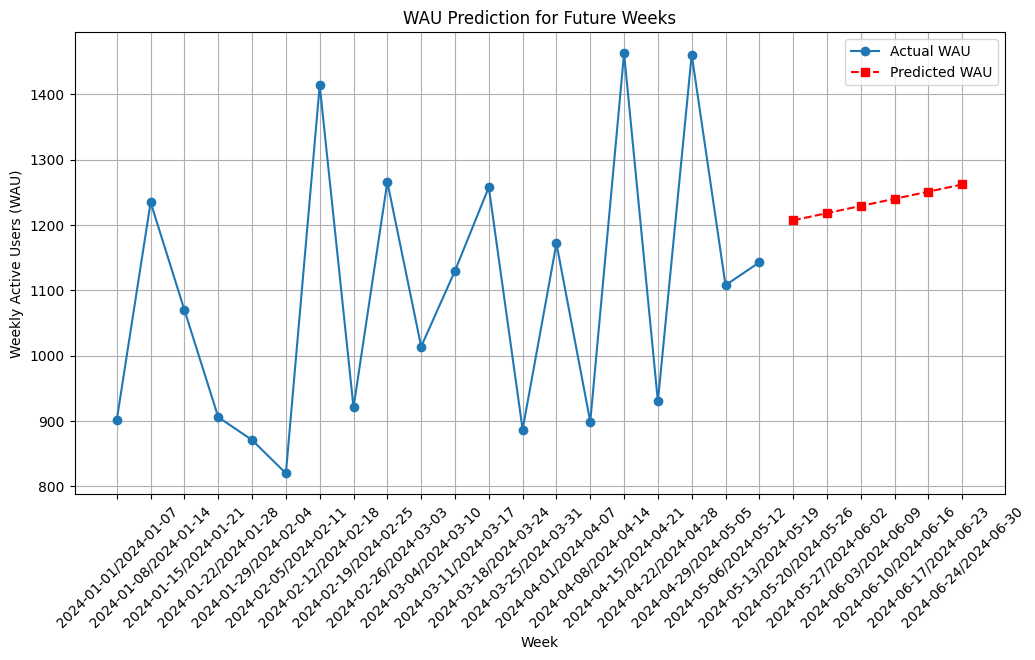

Prediction shows growth in WAU. User engagement is improving!


In [15]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.holtwinters import ExponentialSmoothing

# Sample dataset: Replace with actual WAU data
np.random.seed(42)
weeks = pd.period_range(start='2024-01-01', periods=20, freq='W')
wau = np.random.randint(800, 1500, len(weeks))
weekly_active_users = pd.DataFrame({'week': weeks, 'wau': wau})

# Train the Exponential Smoothing Model
model = ExponentialSmoothing(weekly_active_users['wau'], trend='add', seasonal=None)
fit_model = model.fit()

# Forecast for the next 6 weeks
future_weeks = pd.period_range(start=weekly_active_users['week'].max() + 1, periods=6, freq='W')
future_wau = fit_model.forecast(steps=6)

# Create a forecast DataFrame
future_df = pd.DataFrame({'week': future_weeks, 'wau': future_wau})

# Plot Actual vs. Predicted WAU
plt.figure(figsize=(12, 6))
plt.plot(weekly_active_users['week'].astype(str), weekly_active_users['wau'], marker='o', label="Actual WAU")
plt.plot(future_df['week'].astype(str), future_df['wau'], marker='s', linestyle='--', label="Predicted WAU", color='red')
plt.xticks(rotation=45)
plt.xlabel("Week")
plt.ylabel("Weekly Active Users (WAU)")
plt.title("WAU Prediction for Future Weeks")
plt.legend()
plt.grid()
plt.show()

# Interpretation
if future_wau.iloc[-1] > weekly_active_users['wau'].iloc[-1]:
    print("Prediction shows growth in WAU. User engagement is improving!")
elif future_wau.iloc[-1] < weekly_active_users['wau'].iloc[-1]:
    print("Prediction shows decline in WAU. Consider retention strategies.")
else:
    print("WAU is stable, but further monitoring is needed.")

# Question 7: WAU Forecasting Using ARIMA (Time Series Prediction)

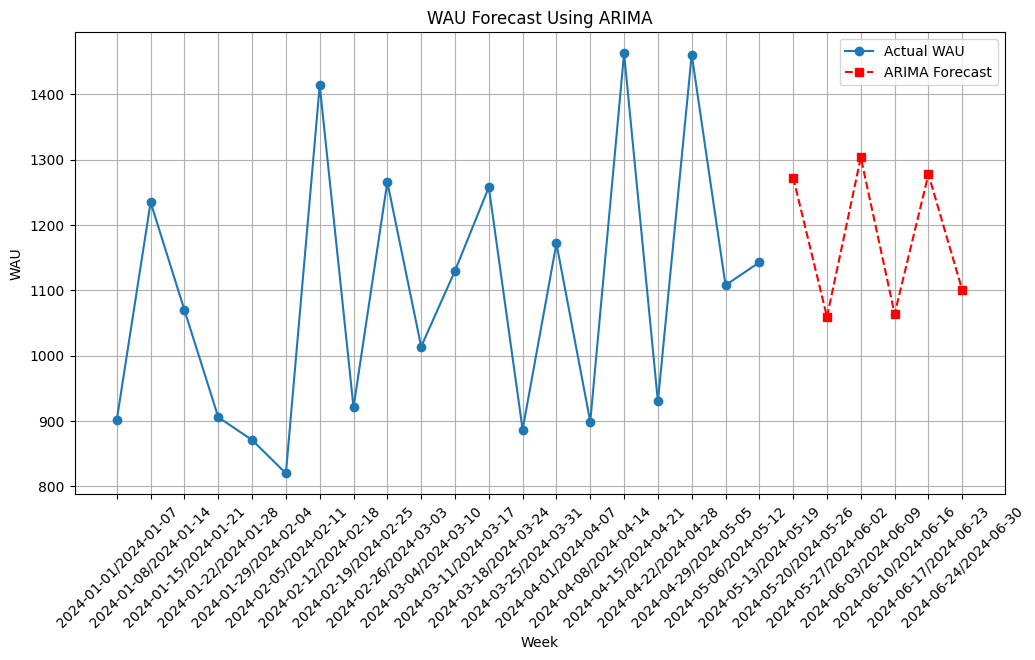

ARIMA predicts WAU decline. Consider retention strategies.


In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA

# Sample WAU Data (Replace with real data)
np.random.seed(42)
weeks = pd.period_range(start='2024-01-01', periods=20, freq='W')
wau = np.random.randint(800, 1500, len(weeks))
wau_df = pd.DataFrame({'week': weeks, 'wau': wau})

# Fit ARIMA Model
model = ARIMA(wau_df['wau'], order=(2,1,2))  # Order (p,d,q) can be optimized
fit_model = model.fit()

# Forecast for next 6 weeks
future_weeks = pd.period_range(start=wau_df['week'].max() + 1, periods=6, freq='W')
future_wau = fit_model.forecast(steps=6)

# Create Forecast DataFrame
future_df = pd.DataFrame({'week': future_weeks, 'wau': future_wau})

# Plot Actual vs. Forecasted WAU
plt.figure(figsize=(12, 6))
plt.plot(wau_df['week'].astype(str), wau_df['wau'], marker='o', label="Actual WAU")
plt.plot(future_df['week'].astype(str), future_df['wau'], marker='s', linestyle='--', color='red', label="ARIMA Forecast")
plt.xticks(rotation=45)
plt.xlabel("Week")
plt.ylabel("WAU")
plt.title("WAU Forecast Using ARIMA")
plt.legend()
plt.grid()
plt.show()

# Interpretation
if future_wau.iloc[-1] > wau_df['wau'].iloc[-1]:
    print("ARIMA predicts WAU growth. User retention is improving!")
else:
    print("ARIMA predicts WAU decline. Consider retention strategies.")

# Question 8: WAU Forecasting Using Facebook Prophet

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


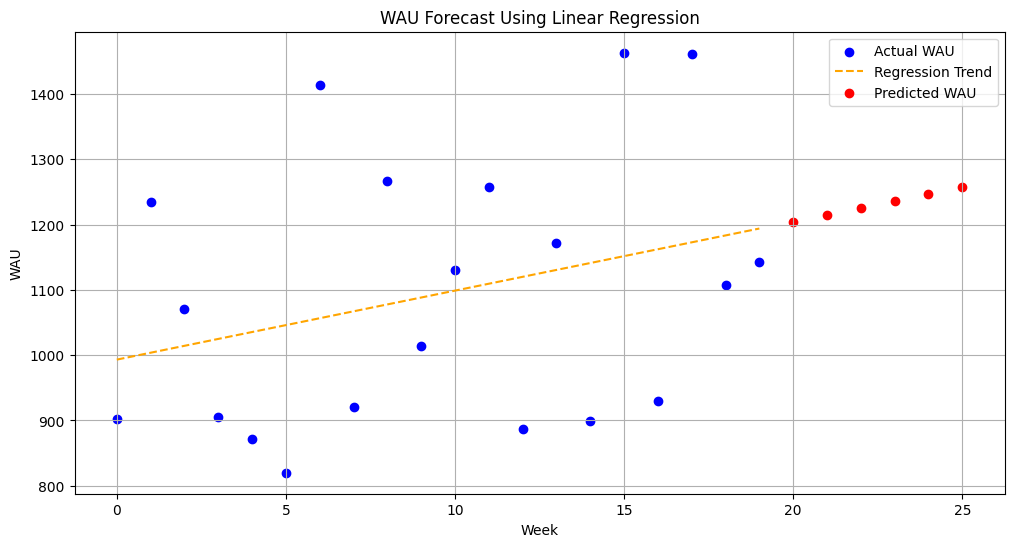

Regression predicts WAU growth. Keep acquiring users!


In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# Sample WAU Data (Replace this with your actual WAU dataset)
np.random.seed(42)
weeks = pd.date_range(start='2024-01-01', periods=20, freq='W')
wau = np.random.randint(800, 1500, len(weeks))
wau_df = pd.DataFrame({'week': weeks, 'wau': wau})

# Convert weeks to numerical values
wau_df['week_num'] = np.arange(len(wau_df))

# Train Linear Regression Model
X = wau_df[['week_num']]
y = wau_df['wau']
model = LinearRegression()
model.fit(X, y)

# Predict WAU for the next 6 weeks
future_weeks = np.arange(len(wau_df), len(wau_df) + 6).reshape(-1, 1)
future_wau = model.predict(future_weeks)

# Create forecast dataframe
future_df = pd.DataFrame({'week': pd.date_range(start=wau_df['week'].max() + pd.Timedelta(weeks=1), periods=6, freq='W'), 'wau': future_wau})

# Plot Actual vs. Predicted WAU
plt.figure(figsize=(12, 6))
plt.scatter(wau_df['week_num'], wau_df['wau'], color='blue', label="Actual WAU")
plt.plot(wau_df['week_num'], model.predict(X), color='orange', linestyle='--', label="Regression Trend")
plt.scatter(future_weeks, future_wau, color='red', label="Predicted WAU")
plt.xlabel("Week")
plt.ylabel("WAU")
plt.title("WAU Forecast Using Linear Regression")
plt.legend()
plt.grid()
plt.show()

# Interpretation
if future_wau[-1] > wau_df['wau'].iloc[-1]:
    print("Regression predicts WAU growth. Keep acquiring users!")
else:
    print("Regression predicts WAU decline. Improve retention efforts.")

# Question 9:Compute and analyze the Quick Ratio over multiple weeks

                      week  new_users  retained_users  resurrected_users  \
0    2024-01-08/2024-01-14          7               0                  7   
1    2024-01-15/2024-01-21          7               0                  7   
2    2024-01-22/2024-01-28          6               0                  6   
3    2024-01-29/2024-02-04          7               0                  7   
4    2024-02-05/2024-02-11          7               0                  7   
..                     ...        ...             ...                ...   
709  2037-08-10/2037-08-16          7               0                  7   
710  2037-08-17/2037-08-23          7               0                  7   
711  2037-08-24/2037-08-30          7               0                  7   
712  2037-08-31/2037-09-06          7               0                  7   
713  2037-09-07/2037-09-13          2               0                  2   

     churned_users  quick_ratio  
0                7     2.000000  
1                7 

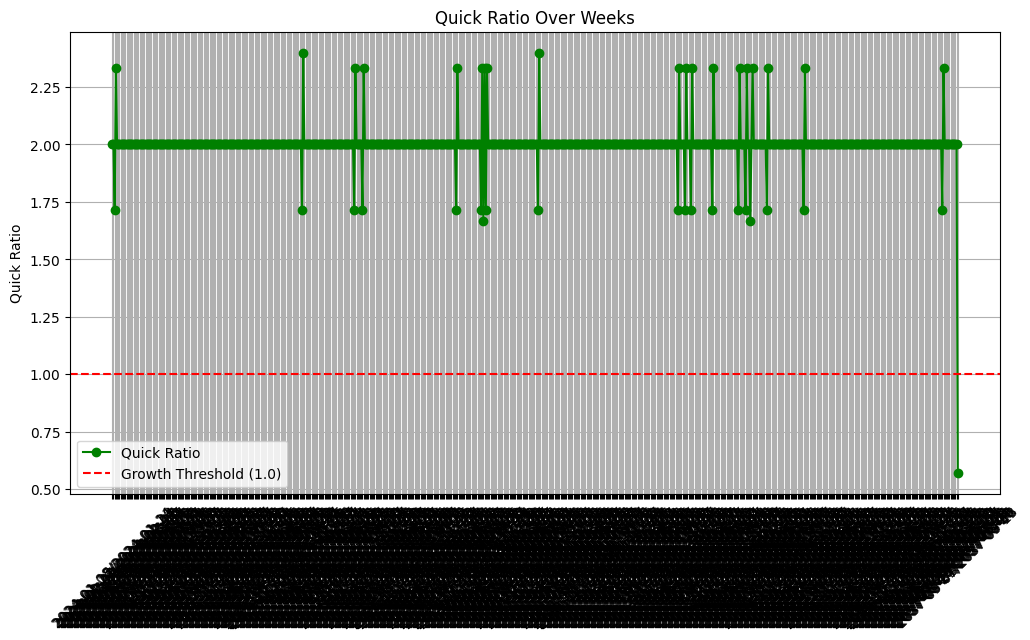

In [18]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Sample Data: Replace this with your actual dataset
# The dataset should have columns: ['user_id', 'date']
data = pd.DataFrame({
    'user_id': np.random.randint(1, 1000, 5000),
    'date': pd.date_range(start='2024-01-01', periods=5000, freq='D')
})

data['date'] = pd.to_datetime(data['date'])
data['week'] = data['date'].dt.to_period('W')

# Weekly Active Users calculation (WAU)
user_weekly = data.groupby(['user_id', 'week']).size().reset_index().pivot(index='user_id', columns='week', values=0)
user_weekly = user_weekly.notnull().astype(int)  # Convert to binary active/inactive

weeks = list(user_weekly.columns)
weekly_stats = []

# Loop through each week to calculate New, Retained, Resurrected, and Churned Users
for i in range(1, len(weeks)):
    prev_week, current_week = weeks[i-1], weeks[i]

    # Calculate New Users: Active in current week, but inactive in previous week
    new_users = (user_weekly[current_week] == 1) & (user_weekly[prev_week] == 0)

    # Calculate Retained Users: Active in both current and previous weeks
    retained_users = (user_weekly[current_week] == 1) & (user_weekly[prev_week] == 1)

    # Calculate Resurrected Users: Inactive in previous week, but active in current week
    resurrected_users = (user_weekly[current_week] == 1) & (user_weekly[prev_week] == 0)

    # Calculate Churned Users: Active in previous week, but inactive in current week
    churned_users = (user_weekly[current_week] == 0) & (user_weekly[prev_week] == 1)

    # Calculate Quick Ratio
    quick_ratio = (new_users.sum() + resurrected_users.sum()) / churned_users.sum() if churned_users.sum() > 0 else np.nan

    weekly_stats.append({
        'week': current_week,
        'new_users': new_users.sum(),
        'retained_users': retained_users.sum(),
        'resurrected_users': resurrected_users.sum(),
        'churned_users': churned_users.sum(),
        'quick_ratio': quick_ratio
    })

# Create DataFrame with the results
stats_df = pd.DataFrame(weekly_stats)

# Display the calculated stats
print(stats_df)

# Plotting the Quick Ratio over weeks
plt.figure(figsize=(12, 6))
plt.plot(stats_df['week'].astype(str), stats_df['quick_ratio'], label='Quick Ratio', marker='o', color='green')

# Adding labels and title
plt.axhline(y=1, color='red', linestyle='--', label='Growth Threshold (1.0)')  # Quick Ratio threshold
plt.xticks(rotation=45)
plt.ylabel('Quick Ratio')
plt.title('Quick Ratio Over Weeks')
plt.legend()
plt.grid()

# Show the plot
plt.show()